# Project 4, APS1070 Fall 2021
#### **Linear Regression**
Liyan Liu

## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

In [ ]:
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
### Split the data  ###
X=df.drop(columns=['Goal'])
y=df['Goal']
#first split the data into 70% training and 30% test
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=1)
#Next split the test set above by half, 30%*50%=15% validation set and 30%*50%=15% test set
X_val, X_test, y_val, y_test= train_test_split(X_test1, y_test1, test_size=0.5, random_state=1)
### Standardize the data using StandardScaler from sklearn ##
scaler = StandardScaler().fit(X_train)
X_train_sd = scaler.transform(X_train)
X_val_sd = scaler.transform(X_val)
X_test_sd = scaler.transform(X_test)


In [ ]:
X_train_sd

array([[-0.36108536, -0.90578423, -0.11948797, ...,  0.01177061,
        -0.62878591, -0.72132656],
       [-0.99493554, -1.36985832, -1.7998678 , ...,  0.01177061,
         0.39274576,  0.57795218],
       [-1.1255471 ,  0.17705531, -0.61371733, ...,  0.01177061,
        -0.11802007, -0.28823365],
       ...,
       [ 0.10757962,  1.76264179,  1.59384048, ...,  0.01177061,
         0.39274576,  0.43358788],
       [ 1.49436698,  0.91183929, -1.37153569, ...,  0.01177061,
        -0.62878591, -0.72132656],
       [-0.59541786, -0.20967309,  0.27589552, ...,  0.01177061,
        -0.62878591, -0.57696225]])

In [ ]:
### Insert the first column of all 1s in the training, validation, and test set ###
X_train_f = np.column_stack((np.ones(np.shape(X_train_sd)[0]), X_train_sd))
X_val_f = np.column_stack((np.ones(np.shape(X_val_sd)[0]), X_val_sd))
X_test_f = np.column_stack((np.ones(np.shape(X_test_sd)[0]), X_test_sd))

In [ ]:
X_train_f

array([[ 1.        , -0.36108536, -0.90578423, ...,  0.01177061,
        -0.62878591, -0.72132656],
       [ 1.        , -0.99493554, -1.36985832, ...,  0.01177061,
         0.39274576,  0.57795218],
       [ 1.        , -1.1255471 ,  0.17705531, ...,  0.01177061,
        -0.11802007, -0.28823365],
       ...,
       [ 1.        ,  0.10757962,  1.76264179, ...,  0.01177061,
         0.39274576,  0.43358788],
       [ 1.        ,  1.49436698,  0.91183929, ...,  0.01177061,
        -0.62878591, -0.72132656],
       [ 1.        , -0.59541786, -0.20967309, ...,  0.01177061,
        -0.62878591, -0.57696225]])

Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)?

**For full batch gradient descent, one epoch is one iteration. For mini batch gradient descent, one epoch takes k iterations. For stochastic gradient descent, one epoch takes n iterations.**


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
import scipy
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [ ]:
def Direct_sol_reg (X_train, y_train, X_valid, y_valid, lm):
  W = np.dot(scipy.linalg.inv(np.dot(X_train.T, X_train) + (lm)*np.identity(np.shape(X_train)[1])), np.dot(X_train.T, y_train))
  y_pred_train = np.dot(X_train, W)
  y_pred_valid = np.dot(X_valid, W)
  RMSE_train = rmse(y_pred_train, y_train)
  RMSE_valid = rmse(y_pred_valid, y_valid)
  #plt.scatter(X_train[:,1], y_train, label='Data')
  #plt.scatter(X_train[:,1], y_pred_train, label='Prediction')
  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)
  #plt.legend()
  #plt.show()
  return W , y_pred_train , y_pred_valid , RMSE_train , RMSE_valid

In [ ]:
w_ds, y_pred_train_ds, y_pred_val_ds, RMSE_train_ds, RMSE_val_ds = Direct_sol_reg( X_train_f, y_train , X_val_f, y_val ,0)

RMSE on training set:  0.00017707758079743764
RMSE on validation set:  0.00017415588907568788


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

X_validation:  (2062, 41)
weights:  (41,)
Predict_validation:  (2062,)
y_validation:  (2062,)
gradient:  (41,)


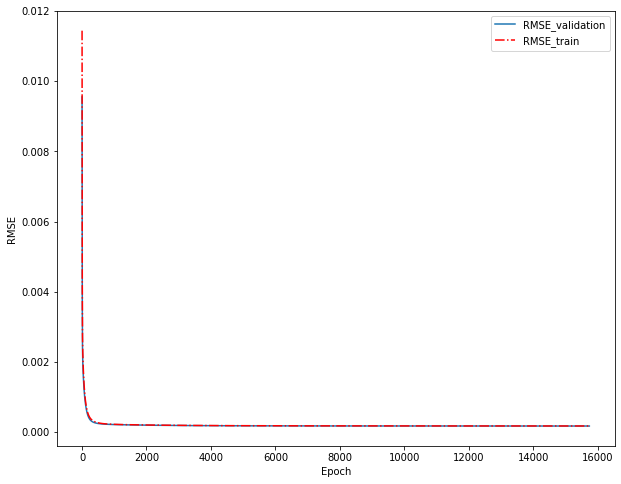

--- Total Training Time: 16.11227011680603 (s) ---


In [ ]:
import time
start_time = time.time() ## Records current time

## First iteration of GD ##
r, c = X_train_f.shape
w = np.random.random(c)*0.001 # Inital weights
lr = .01  # Learning rate
rmse_train=[]
rmse_val=[]
predict_train= np.dot(X_train_f,w.T)
rmse_train.append(rmse(predict_train,y_train))
gradient = (1/r * np.dot(X_train_f.T, predict_train-y_train))
w = w - lr * gradient # weight update
predict_val= np.dot(X_val_f,w)
rmse_val.append(rmse(predict_val,y_val))

## Iterating GD until it converges ##
while rmse_val[-1]>1.001*RMSE_val_ds:
  predict_train= np.dot(X_train_f,w)
  rmse_train.append(rmse(predict_train,y_train))
  gradient = (1/r * np.dot(X_train_f.T, predict_train-y_train))
  w = w - lr * gradient # weight update
  predict_val= np.dot(X_val_f,w)
  rmse_val.append(rmse(predict_val,y_val))
print ("X_validation: ", X_val_f.shape)
print ("weights: ", w.shape)
print ("Predict_validation: ", predict_val.shape)
print ("y_validation: ", y_val.shape)
print ("gradient: ", gradient.shape)
# Plot the training RMSE and the validation RMSE vs. epoch on the same figure. 
fig = plt.figure(figsize=(10, 8))
plt.plot(rmse_val,label='RMSE_validation')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.plot(rmse_train,'r-.', label='RMSE_train')
plt.legend(loc=1)
plt.show()
# Report training time
print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

In [ ]:
rmse_val[-20:]

[0.00017433107740573586,
 0.00017433102025633573,
 0.00017433096312000423,
 0.00017433090599673688,
 0.00017433084888652915,
 0.00017433079178937654,
 0.00017433073470527453,
 0.00017433067763421864,
 0.00017433062057620435,
 0.00017433056353122713,
 0.00017433050649928253,
 0.00017433044948036603,
 0.0001743303924744731,
 0.0001743303354815993,
 0.0001743302785017401,
 0.000174330221534891,
 0.00017433016458104757,
 0.00017433010764020525,
 0.00017433005071235957,
 0.0001743299937975061]

In [ ]:
rmse_train[-20:]

[0.00017599087723218267,
 0.00017599077472441052,
 0.00017599067223946304,
 0.0001759905697773336,
 0.00017599046733801575,
 0.00017599036492150293,
 0.00017599026252778846,
 0.00017599016015686588,
 0.00017599005780872864,
 0.00017598995548337017,
 0.00017598985318078395,
 0.00017598975090096338,
 0.000175989648643902,
 0.00017598954640959318,
 0.00017598944419803042,
 0.0001759893420092072,
 0.00017598923984311695,
 0.00017598913769975317,
 0.0001759890355791093,
 0.00017598893348117883]

Comment on overfitting/underfitting by observing the training and validation RMSE?

**By looking at the graph and the last 20 elements in RMSE, we can see that RMSE of validation set decreases as the EMSE of training set decreases. Thus, there's no overfitting problem. Also, since the Gradient descent RMSE of validation set is close to zero, we do not observe underfitting.**

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
def mini_batch (X_train, y_train, X_val, y_val, size, learn_rate, CT):
  row, col=X_train.shape
  num_batch = int(np.ceil(np.divide(row, size)))
  rmse_t=0 #initial value of RMSE of training set
  rmse_v=5 #initial value of RMSE of validation set
  RMSE_val_mini=[]
  RMSE_train_mini=[]
  elapse_time=[]
  weight = np.random.random(col)*0.001 # Inital weights
  min_RMSE_t=100 #keep track of the minimum RMSE training among epochs for finding divergence
  min_RMSE_v=100 #keep track of the minimum RMSE validation among epochs for finding divergence
  start_time = time.time()
  while rmse_v>CT: #loop over epoch
    if min_RMSE_t*100<=rmse_t or min_RMSE_v*100<=rmse_v: # check if divergent
      print("For batch size",size,": Function terminated due to divergence. Change batch size!")
      return weight, RMSE_train_mini, RMSE_val_mini, elapse_time
    #start_time = time.time()
    shuffle_indices = np.random.permutation(row)
    X_tmp = X_train[shuffle_indices]
    y_tmp = y_train.iloc[shuffle_indices]
    rmse_t=0
    for j in range(0,row,size): #loop over batch
      Xj = X_tmp[j:j+size]
      yj = y_tmp[j:j+size]
      predict_train= np.dot(Xj,weight)
      rmse_t=rmse_t+rmse(predict_train,yj)
      grad = (1/Xj.shape[0] * np.dot(Xj.T, predict_train-yj))
      weight = weight - learn_rate * grad # weight update
    
    elapse_time.append(time.time() - start_time)
    RMSE_train_mini.append(rmse_t)
    predict_val= np.dot(X_val,weight)
    rmse_v=rmse(predict_val,y_val)
    RMSE_val_mini.append(rmse_v)
    if rmse_t < min_RMSE_t:
      min_RMSE_t = rmse_t
    if rmse_v < min_RMSE_v:
      min_RMSE_v = rmse_v
    
  
  return weight, RMSE_train_mini, RMSE_val_mini, elapse_time


  

In [ ]:
weight, RMSE_train_mini, RMSE_val_mini, elapse_time= mini_batch (X_train_f, y_train, X_val_f, y_val, 128, 0.01, 1.001*RMSE_val_ds)

In [ ]:
len(RMSE_train_mini)

239

In [ ]:
weight, RMSE_train_mini, RMSE_val_mini, elapse_time= mini_batch (X_train_f, y_train, X_val_f, y_val, 4000, 0.01, 1.001*RMSE_val_ds)

In [ ]:
len(RMSE_val_mini)

2110

In [ ]:
#sweep 6 different batch size: 32, 64, 128, 512, 1024, 2048
w1, RMSE_t1, RMSE_v1, elapse1 = mini_batch (X_train_f, y_train, X_val_f, y_val, 32, 0.01, 1.001*RMSE_val_ds)
w2, RMSE_t2, RMSE_v2, elapse2 = mini_batch (X_train_f, y_train, X_val_f, y_val, 64, 0.01, 1.001*RMSE_val_ds)
w3, RMSE_t3, RMSE_v3, elapse3 = mini_batch (X_train_f, y_train, X_val_f, y_val, 128, 0.01, 1.001*RMSE_val_ds)
w4, RMSE_t4, RMSE_v4, elapse4 = mini_batch (X_train_f, y_train, X_val_f, y_val, 512, 0.01, 1.001*RMSE_val_ds)
w5, RMSE_t5, RMSE_v5, elapse5 = mini_batch (X_train_f, y_train, X_val_f, y_val, 1024, 0.01, 1.001*RMSE_val_ds)
w6, RMSE_t6, RMSE_v6, elapse6 = mini_batch (X_train_f, y_train, X_val_f, y_val, 2048, 0.01, 1.001*RMSE_val_ds)

For batch size 32 : Function terminated due to divergence. Change batch size!


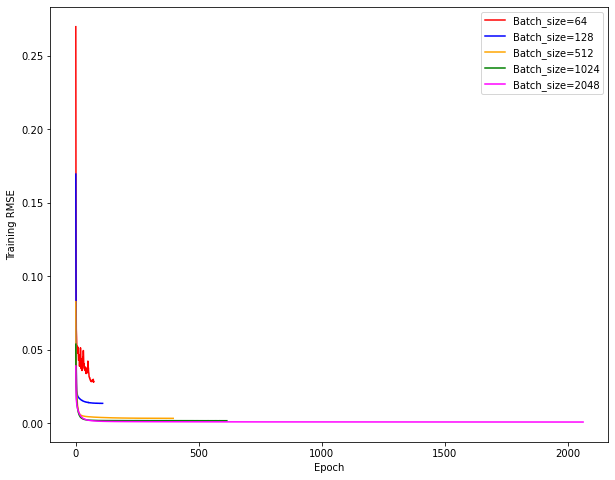

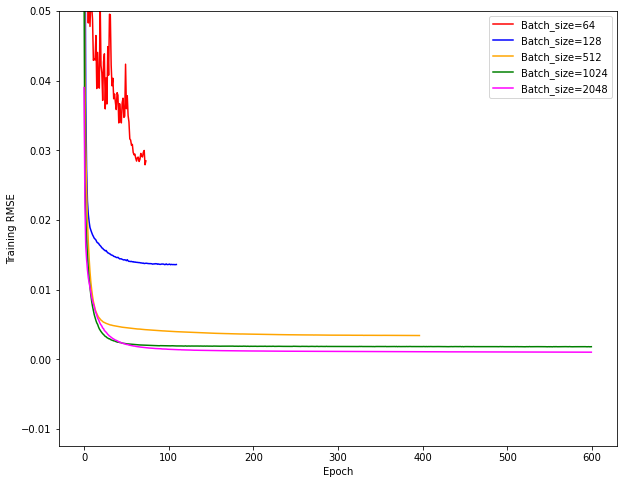

In [ ]:
# Plot training RMSE vs. epoch for all the converging batch sizes
fig = plt.figure(figsize=(10, 8))
plt.plot(RMSE_t2,color='red',label='Batch_size=64')
plt.plot(RMSE_t3,color='blue',label='Batch_size=128')
plt.plot(RMSE_t4,color='orange',label='Batch_size=512')
plt.plot(RMSE_t5,color='green',label='Batch_size=1024')
plt.plot(RMSE_t6,color='magenta',label='Batch_size=2048')
plt.xlabel("Epoch")
plt.ylabel("Training RMSE")
plt.legend(loc=1)
plt.show()
# Since the curves overlap, we zoom in a little by looking at only the first 600 epochs
fig = plt.figure(figsize=(10, 8))
plt.plot(RMSE_t2[0:600],color='red',label='Batch_size=64')
plt.plot(RMSE_t3[0:600],color='blue',label='Batch_size=128')
plt.plot(RMSE_t4[0:600],color='orange',label='Batch_size=512')
plt.plot(RMSE_t5[0:600],color='green',label='Batch_size=1024')
plt.plot(RMSE_t6[0:600],color='magenta',label='Batch_size=2048')
plt.ylim(top=0.05)
plt.xlabel("Epoch")
plt.ylabel("Training RMSE")
plt.legend(loc=1)
plt.show()

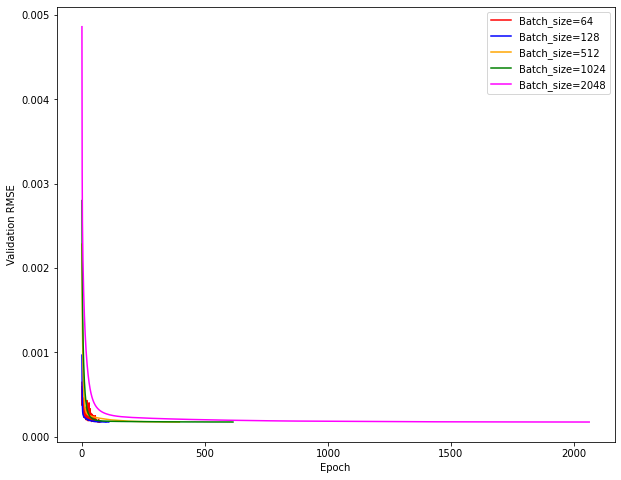

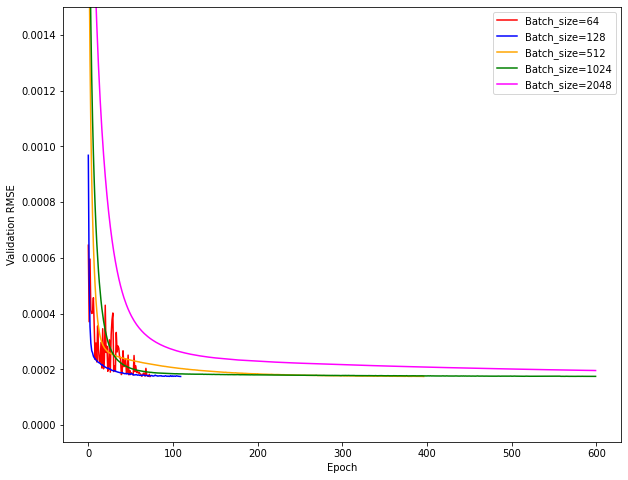

In [ ]:
# Plot validation RMSE vs. epoch for all the converging batch sizes
fig = plt.figure(figsize=(10, 8))
plt.plot(RMSE_v2,color='red',label='Batch_size=64')
plt.plot(RMSE_v3,color='blue',label='Batch_size=128')
plt.plot(RMSE_v4,color='orange',label='Batch_size=512')
plt.plot(RMSE_v5,color='green',label='Batch_size=1024')
plt.plot(RMSE_v6,color='magenta',label='Batch_size=2048')
plt.xlabel("Epoch")
plt.ylabel("Validation RMSE")
plt.legend(loc=1)
plt.show()
# Since the curves overlap, we zoom in a little by looking at only the first 600 epochs
fig = plt.figure(figsize=(10, 8))
plt.plot(RMSE_v2[0:600],color='red',label='Batch_size=64')
plt.plot(RMSE_v3[0:600],color='blue',label='Batch_size=128')
plt.plot(RMSE_v4[0:600],color='orange',label='Batch_size=512')
plt.plot(RMSE_v5[0:600],color='green',label='Batch_size=1024')
plt.plot(RMSE_v6[0:600],color='magenta',label='Batch_size=2048')
plt.ylim(top=0.0015)
plt.xlabel("Epoch")
plt.ylabel("Validation RMSE")
plt.legend(loc=1)
plt.show()

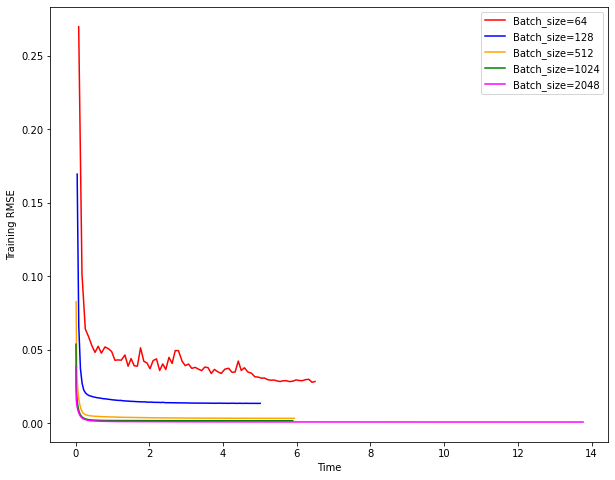

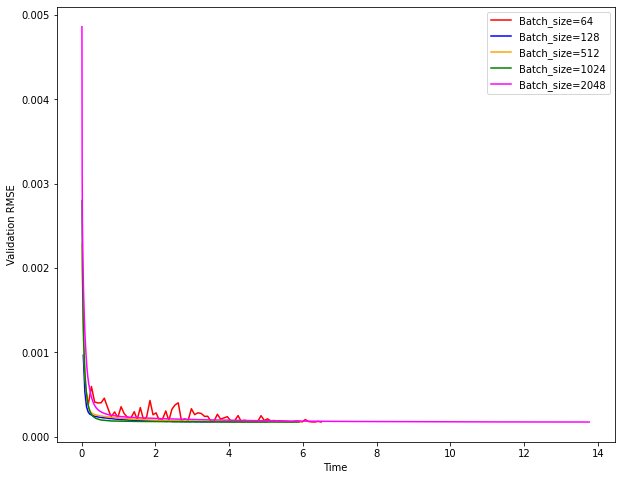

In [ ]:
# Plot training RMSE vs. time for all the converging batch sizes
fig = plt.figure(figsize=(10, 8))
plt.plot(elapse2,RMSE_t2,color='red',label='Batch_size=64')
plt.plot(elapse3,RMSE_t3,color='blue',label='Batch_size=128')
plt.plot(elapse4,RMSE_t4,color='orange',label='Batch_size=512')
plt.plot(elapse5,RMSE_t5,color='green',label='Batch_size=1024')
plt.plot(elapse6,RMSE_t6,color='magenta',label='Batch_size=2048')
plt.xlabel("Time")
plt.ylabel("Training RMSE")
plt.legend(loc=1)
plt.show()
# Plot validation RMSE vs. time for all the converging batch sizes
fig = plt.figure(figsize=(10, 8))
plt.plot(elapse2,RMSE_v2,color='red',label='Batch_size=64')
plt.plot(elapse3,RMSE_v3,color='blue',label='Batch_size=128')
plt.plot(elapse4,RMSE_v4,color='orange',label='Batch_size=512')
plt.plot(elapse5,RMSE_v5,color='green',label='Batch_size=1024')
plt.plot(elapse6,RMSE_v6,color='magenta',label='Batch_size=2048')
plt.xlabel("Time")
plt.ylabel("Validation RMSE")
plt.legend(loc=1)
plt.show()

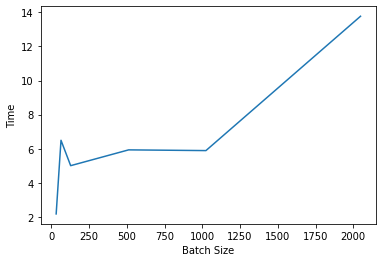

In [ ]:
#Plot Total training time (y-axis) vs. Batch size (x-axis)
training_time=[elapse1[-1],elapse2[-1],elapse3[-1],elapse4[-1],elapse5[-1],elapse6[-1]]
size=[32,64,128,512,1024,2048]
plt.plot(size,training_time)
plt.xlabel("Batch Size")
plt.ylabel("Time")
plt.show()

**After use 6 different batch size: 32, 64, 128, 512, 1024, 2048, we dicover that the RMSE diverge when batch size is 32. For batch size larger than 32, they are all converging.**

**By looking at RMSE vs. epoch, we notice that the number of epochs increases as batch size gets larger. Moreover,for small batch size, for example, size=64, RMSE of training and validation set have incentive to diverge, but eventually converge to small RMSEs. As batch size increases, the converge trend becomes more clearly. We can see the curve of batch size 2056, the RMSE sharply decline within 100 epochs and remain constant at a value close to zero after that.**

**RMSE vs. time plot demonstrates similar patterns as RMSE vs. epoch plot. The training time increases as the batch size gets larger. This is intuitive because the larger batch size needs larger number of epochs, and therefore the training time is longer.**

**The plot of total training time vs. Batch size shows an upward trend. With an exception that when batch size=32, the training time does not follow that trend since time stops when divergence happened. For convergent batch size, we see a positive relationship betweeen time and batch size: total training time increases as batch size increases.**

## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**

In [ ]:
def GS_momentum (X_train, y_train, X_val, y_val, size, learn_rate, CT, mmt):
  row, col=X_train.shape
  num_batch = int(np.ceil(np.divide(row, size)))
  rmse_t=0 #initial value of RMSE of training set
  rmse_v=5 #initial value of RMSE of validation set
  RMSE_val_mini=[]
  RMSE_train_mini=[]
  elapse_time=[]
  g=0 #initial value of previous weight updates
  weight = np.random.random(col)*0.001 # Inital weights
  min_RMSE_t=100 #keep track of the minimum RMSE training among epochs for finding divergence
  min_RMSE_v=100 #keep track of the minimum RMSE validation among epochs for finding divergence
  start_time = time.time()
  while rmse_v>CT: #loop over epoch
    if min_RMSE_t*100<=rmse_t or min_RMSE_v*100<=rmse_v:
      print("For batch size",size,": Function terminated due to divergence. Change batch size!")
      return weight, RMSE_train_mini, RMSE_val_mini, elapse_time
    shuffle_indices = np.random.permutation(row)
    X_tmp = X_train[shuffle_indices]
    y_tmp = y_train.iloc[shuffle_indices]
    rmse_t=0
    for j in range(0,row,size): #loop over batch
      Xj = X_tmp[j:j+size]
      yj = y_tmp[j:j+size]
      predict_train= np.dot(Xj,weight)
      rmse_t=rmse_t+rmse(predict_train,yj)
      grad = (1/Xj.shape[0] * np.dot(Xj.T, predict_train-yj))
      g=mmt*g+(1-mmt)*grad #introduce momentum
      weight = weight - learn_rate * g # weight update
    
    elapse_time.append(time.time() - start_time)
    RMSE_train_mini.append(rmse_t)
    predict_val= np.dot(X_val,weight)
    rmse_v=rmse(predict_val,y_val)
    RMSE_val_mini.append(rmse_v)
    if rmse_t < min_RMSE_t:
      min_RMSE_t = rmse_t
    if rmse_v < min_RMSE_v:
      min_RMSE_v = rmse_v
    
  
  return weight, RMSE_train_mini, RMSE_val_mini, elapse_time


In [ ]:
# use batch size= 512, try 8 different momentum coefficients: 0, 0.2, 0.35, 0.5, 0.6, 0.75, 0.9, 0.99
weight_mmt1, RMSE_train_mmt1, RMSE_val_mmt1, elapse_mmt1= GS_momentum (X_train_f, y_train, X_val_f, y_val, 512, 0.01, 1.001*RMSE_val_ds, 0)
weight_mmt2, RMSE_train_mmt2, RMSE_val_mmt2, elapse_mmt2= GS_momentum (X_train_f, y_train, X_val_f, y_val, 512, 0.01, 1.001*RMSE_val_ds, 0.2)
weight_mmt3, RMSE_train_mmt3, RMSE_val_mmt3, elapse_mmt3= GS_momentum (X_train_f, y_train, X_val_f, y_val, 512, 0.01, 1.001*RMSE_val_ds, 0.5)
weight_mmt4, RMSE_train_mmt4, RMSE_val_mmt4, elapse_mmt4= GS_momentum (X_train_f, y_train, X_val_f, y_val, 512, 0.01, 1.001*RMSE_val_ds, 0.75)
weight_mmt5, RMSE_train_mmt5, RMSE_val_mmt5, elapse_mmt5= GS_momentum (X_train_f, y_train, X_val_f, y_val, 512, 0.01, 1.001*RMSE_val_ds, 0.9)
weight_mmt6, RMSE_train_mmt6, RMSE_val_mmt6, elapse_mmt6= GS_momentum (X_train_f, y_train, X_val_f, y_val, 512, 0.01, 1.001*RMSE_val_ds, 0.99)
weight_mmt7, RMSE_train_mmt7, RMSE_val_mmt7, elapse_mmt7= GS_momentum (X_train_f, y_train, X_val_f, y_val, 512, 0.01, 1.001*RMSE_val_ds, 0.6)
weight_mmt8, RMSE_train_mmt8, RMSE_val_mmt8, elapse_mmt8= GS_momentum (X_train_f, y_train, X_val_f, y_val, 512, 0.01, 1.001*RMSE_val_ds, 0.35)

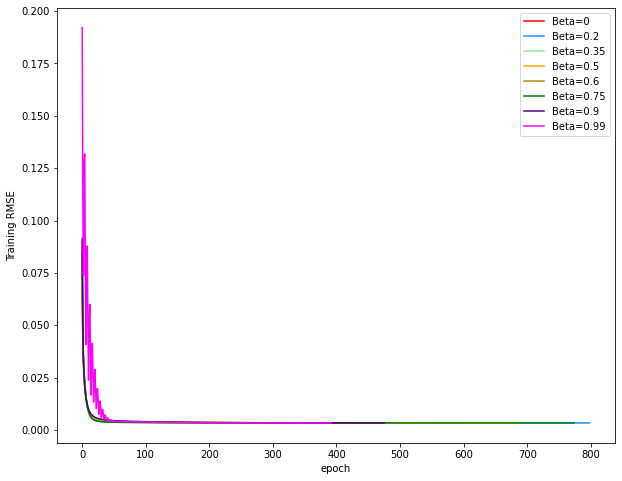

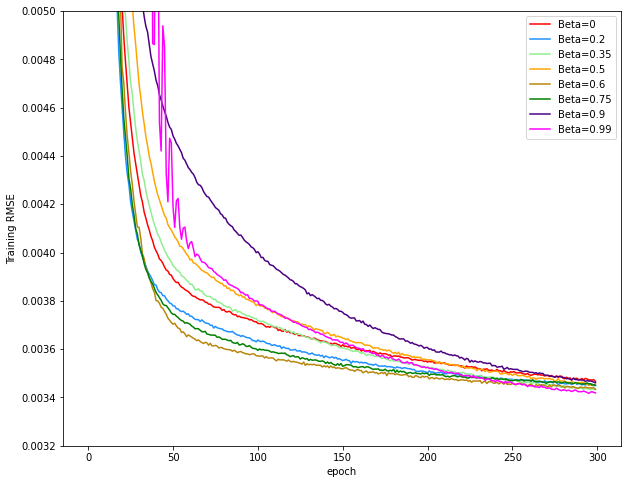

In [ ]:
#Plot your training RMSE for each epoch 
fig = plt.figure(figsize=(10, 8))
plt.plot(RMSE_train_mmt1,color='red',label='Beta=0')
plt.plot(RMSE_train_mmt2,color='dodgerblue',label='Beta=0.2')
plt.plot(RMSE_train_mmt8,color='lightgreen',label='Beta=0.35')
plt.plot(RMSE_train_mmt3,color='orange',label='Beta=0.5')
plt.plot(RMSE_train_mmt7,color='darkgoldenrod',label='Beta=0.6')
plt.plot(RMSE_train_mmt4,color='green',label='Beta=0.75')
plt.plot(RMSE_train_mmt5,color='indigo',label='Beta=0.9')
plt.plot(RMSE_train_mmt6,color='magenta',label='Beta=0.99')

plt.xlabel("epoch")
plt.ylabel("Training RMSE")
plt.legend(loc=1)
plt.show()
#Zoom in the plot to see their difference in RMSE
fig = plt.figure(figsize=(10, 8))
plt.plot(RMSE_train_mmt1[0:300],color='red',label='Beta=0')
plt.plot(RMSE_train_mmt2[0:300],color='dodgerblue',label='Beta=0.2')
plt.plot(RMSE_train_mmt8[0:300],color='lightgreen',label='Beta=0.35')
plt.plot(RMSE_train_mmt3[0:300],color='orange',label='Beta=0.5')
plt.plot(RMSE_train_mmt7[0:300],color='darkgoldenrod',label='Beta=0.6')
plt.plot(RMSE_train_mmt4[0:300],color='green',label='Beta=0.75')
plt.plot(RMSE_train_mmt5[0:300],color='indigo',label='Beta=0.9')
plt.plot(RMSE_train_mmt6[0:300],color='magenta',label='Beta=0.99')

plt.xlabel("epoch")
plt.ylim(top=0.005,bottom=0.0032)
plt.ylabel("Training RMSE")
plt.legend(loc=1)
plt.show()

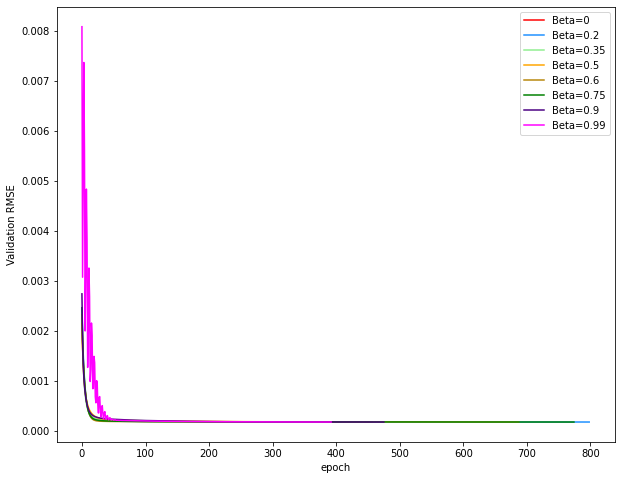

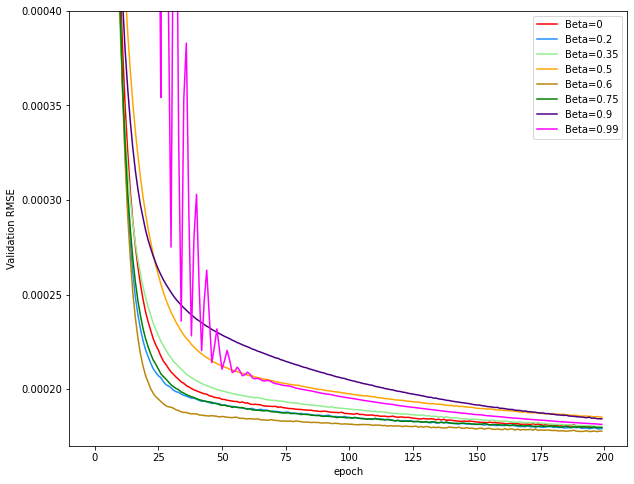

In [ ]:
#Plot your validation RMSE for each epoch 
fig = plt.figure(figsize=(10, 8))
plt.plot(RMSE_val_mmt1,color='red',label='Beta=0')
plt.plot(RMSE_val_mmt2,color='dodgerblue',label='Beta=0.2')
plt.plot(RMSE_val_mmt8,color='lightgreen',label='Beta=0.35')
plt.plot(RMSE_val_mmt3,color='orange',label='Beta=0.5')
plt.plot(RMSE_val_mmt7,color='darkgoldenrod',label='Beta=0.6')
plt.plot(RMSE_val_mmt4,color='green',label='Beta=0.75')
plt.plot(RMSE_val_mmt5,color='indigo',label='Beta=0.9')
plt.plot(RMSE_val_mmt6,color='magenta',label='Beta=0.99')
plt.xlabel("epoch")
plt.ylabel("Validation RMSE")
plt.legend(loc=1)
plt.show()
#Zoom in the plot to see their difference in RMSE
fig = plt.figure(figsize=(10, 8))
plt.plot(RMSE_val_mmt1[0:200],color='red',label='Beta=0')
plt.plot(RMSE_val_mmt2[0:200],color='dodgerblue',label='Beta=0.2')
plt.plot(RMSE_val_mmt8[0:200],color='lightgreen',label='Beta=0.35')
plt.plot(RMSE_val_mmt3[0:200],color='orange',label='Beta=0.5')
plt.plot(RMSE_val_mmt7[0:200],color='darkgoldenrod',label='Beta=0.6')
plt.plot(RMSE_val_mmt4[0:200],color='green',label='Beta=0.75')
plt.plot(RMSE_val_mmt5[0:200],color='indigo',label='Beta=0.9')
plt.plot(RMSE_val_mmt6[0:200],color='magenta',label='Beta=0.99')
plt.xlabel("epoch")
plt.ylim(top=0.0004,bottom=0.00017)
plt.ylabel("Validation RMSE")
plt.legend(loc=1)
plt.show()

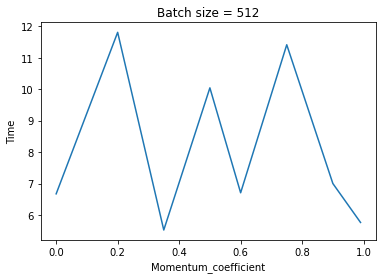

In [ ]:
#With some plots (or tables) show how momentum affects the training time.
training_time=[elapse_mmt1[-1],elapse_mmt2[-1],elapse_mmt8[-1],elapse_mmt3[-1],elapse_mmt7[-1],elapse_mmt4[-1],elapse_mmt5[-1],elapse_mmt6[-1]]
momentum=[0, 0.2, 0.35, 0.5, 0.6, 0.75, 0.9, 0.99]
plt.plot(momentum,training_time)
plt.xlabel("Momentum_coefficient")
plt.ylabel("Time")
plt.title("Batch size = 512")
plt.show()

For only one batch size, the relationship betweeen momentum and training time may not be representative. So, we can try a different batch size, 2048.

In [ ]:
# use batch size= 2048, try 8 different momentum coefficients: 0, 0.2, 0.35, 0.5, 0.6, 0.75, 0.9, 0.99
weight_mmt11, RMSE_train_mmt11, RMSE_val_mmt11, elapse_mmt11= GS_momentum (X_train_f, y_train, X_val_f, y_val, 2048, 0.01, 1.001*RMSE_val_ds, 0)
weight_mmt22, RMSE_train_mmt22, RMSE_val_mmt22, elapse_mmt22= GS_momentum (X_train_f, y_train, X_val_f, y_val, 2048, 0.01, 1.001*RMSE_val_ds, 0.2)
weight_mmt33, RMSE_train_mmt33, RMSE_val_mmt33, elapse_mmt33= GS_momentum (X_train_f, y_train, X_val_f, y_val, 2048, 0.01, 1.001*RMSE_val_ds, 0.5)
weight_mmt44, RMSE_train_mmt44, RMSE_val_mmt44, elapse_mmt44= GS_momentum (X_train_f, y_train, X_val_f, y_val, 2048, 0.01, 1.001*RMSE_val_ds, 0.75)
weight_mmt55, RMSE_train_mmt55, RMSE_val_mmt55, elapse_mmt55= GS_momentum (X_train_f, y_train, X_val_f, y_val, 2048, 0.01, 1.001*RMSE_val_ds, 0.9)
weight_mmt66, RMSE_train_mmt66, RMSE_val_mmt66, elapse_mmt66= GS_momentum (X_train_f, y_train, X_val_f, y_val, 2048, 0.01, 1.001*RMSE_val_ds, 0.99)
weight_mmt77, RMSE_train_mmt77, RMSE_val_mmt77, elapse_mmt77= GS_momentum (X_train_f, y_train, X_val_f, y_val, 2048, 0.01, 1.001*RMSE_val_ds, 0.6)
weight_mmt88, RMSE_train_mmt88, RMSE_val_mmt88, elapse_mmt88= GS_momentum (X_train_f, y_train, X_val_f, y_val, 2048, 0.01, 1.001*RMSE_val_ds, 0.35)

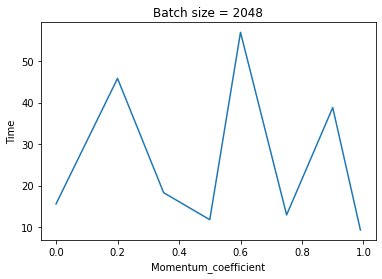

In [ ]:
training_time=[elapse_mmt11[-1],elapse_mmt22[-1],elapse_mmt88[-1],elapse_mmt33[-1],elapse_mmt77[-1],elapse_mmt44[-1],elapse_mmt55[-1],elapse_mmt66[-1]]
momentum=[0, 0.2, 0.35, 0.5, 0.6, 0.75, 0.9, 0.99]
plt.plot(momentum,training_time)
plt.xlabel("Momentum_coefficient")
plt.ylabel("Time")
plt.title("Batch size = 2048")
plt.show()

We can try a different batch size, 128.

In [ ]:
# use batch size= 128, try 8 different momentum coefficients: 0, 0.2, 0.35, 0.5, 0.6, 0.75, 0.9, 0.99
weight_mmt111, RMSE_train_mmt111, RMSE_val_mmt111, elapse_mmt111= GS_momentum (X_train_f, y_train, X_val_f, y_val, 128, 0.01, 1.001*RMSE_val_ds, 0)
weight_mmt222, RMSE_train_mmt22, RMSE_val_mmt222, elapse_mmt222= GS_momentum (X_train_f, y_train, X_val_f, y_val, 128, 0.01, 1.001*RMSE_val_ds, 0.2)
weight_mmt333, RMSE_train_mmt333, RMSE_val_mmt333, elapse_mmt333= GS_momentum (X_train_f, y_train, X_val_f, y_val, 128, 0.01, 1.001*RMSE_val_ds, 0.5)
weight_mmt444, RMSE_train_mmt444, RMSE_val_mmt444, elapse_mmt444= GS_momentum (X_train_f, y_train, X_val_f, y_val, 128, 0.01, 1.001*RMSE_val_ds, 0.75)
weight_mmt555, RMSE_train_mmt555, RMSE_val_mmt555, elapse_mmt555= GS_momentum (X_train_f, y_train, X_val_f, y_val, 128, 0.01, 1.001*RMSE_val_ds, 0.9)
weight_mmt666, RMSE_train_mmt666, RMSE_val_mmt666, elapse_mmt666= GS_momentum (X_train_f, y_train, X_val_f, y_val, 128, 0.01, 1.001*RMSE_val_ds, 0.99)
weight_mmt777, RMSE_train_mmt777, RMSE_val_mmt777, elapse_mmt777= GS_momentum (X_train_f, y_train, X_val_f, y_val, 128, 0.01, 1.001*RMSE_val_ds, 0.6)
weight_mmt888, RMSE_train_mmt888, RMSE_val_mmt888, elapse_mmt888= GS_momentum (X_train_f, y_train, X_val_f, y_val, 128, 0.01, 1.001*RMSE_val_ds, 0.35)

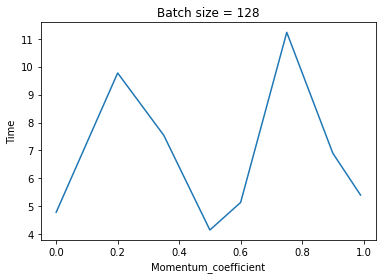

In [ ]:
training_time=[elapse_mmt111[-1],elapse_mmt222[-1],elapse_mmt888[-1],elapse_mmt333[-1],elapse_mmt777[-1],elapse_mmt444[-1],elapse_mmt555[-1],elapse_mmt666[-1]]
momentum=[0, 0.2, 0.35, 0.5, 0.6, 0.75, 0.9, 0.99]
plt.plot(momentum,training_time)
plt.xlabel("Momentum_coefficient")
plt.ylabel("Time")
plt.title("Batch size = 128")
plt.show()

Summarize your experiments and comment on the effect of momentum:

**By using batch size= 512, we can see that the magnitude of beta(momentum coefficient) has different effects on RMSE. Notice that when beta=0, then it is just the same as mini-batch/SGD from the previous part. So, we can compare other values of beta to beta=0, to see the momentum effect on the data. According to the plot of Validation RMSE vs. Epoch, we see that RMSEs when beta=0.2, 0.75, and 0.6 are lower than RMSE without momentum(beta=0). The values of beta that make RMSE smallest is 0.6. Therefore, in this case, the optimal value of beta is 0.6, and momentum can improve the performance of mini-batch/SGD. On the other hand, there're values of beta that perform worse than mini-batch gradient descent without momentum, for example, when beta is more close to 1 (beta=0.9 and 0.99). More importantly, the RMSE seems to have incentive to diverge when beta=0.99. Thus, based on our observation, when introducing momentum, the value of beta needs to be carefully chosen in order to improve the performance of model.**

**Moreover, I also try to find patterns between momentum and training time. By plotting the time vs. momentum coefficients(betas) of batch size 512, we discover that for beta that closer to either 0 or 1, the training times are lower. For betas that has better performance of reducing RMSE, for example, beta=0.2 and 0.75, the training times are larger due to larger numbers of epochs in training. However, for the beta=0.6, which has the best performance on RMSE, its training time is roughly the same as the one without momentum(beta=0).One plot of time vs. beta might not be representative. So I try different batch size: 2048 and 128. They both show similar patterns as the plot of batch size=512.**










## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 


Briefly describe your model selections/settings:

**Based on part 5, we know that mini-batch gradient descent with momentum has better performance than mini-batch gradient descent without momentum at certain value of beta. Also, from part 4, we know that, the training time increases as the batch size increases. Therefore, mini-batch GS is better than full-batch GS since it has less training time. Since a mini-batch of size 512 has moderate training time and better performance(lower RMSE on validation set) on our dataset, and with beta=0.6, the RMSE of validation can be even lower. Therefore, we choose mini-batch gradient descent of size 512 with momentum coefficient equals to 0.6, thershold=1.001*validation RMSE using direct solution and learning rate=0.01 as our final optimal model for the data.**

In [ ]:
# mini-batch with momentum beta=0.6, batch_size=512, thershold=1.001*validation RMSE using direct solution, learning rate=0.01
weight_final, RMSE_train_final, RMSE_val_final, elapse_final= GS_momentum (X_train_f, y_train, X_val_f, y_val, 512, 0.01, 1.001*RMSE_val_ds, 0.6)

In [ ]:
# using the weight we get from above to predict the target of test set
predict_test= np.dot(X_test_f,weight_final)
rmse_test=rmse(predict_test,y_test)

In [ ]:
rmse_test

0.00016934749118738875

**My final model perform pretty good for the task of managing ailerons of an aircraft, because the RMSE on the test set is very close to zero, 0.00016934749118738875. That means that our predictions is very close to the actual target. Therefore, our model can predict pretty accurate values of our target variable, Goal, given all features we have about ailerons.**